In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=df.to_html().replace('table','table style="display:inline-block"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

import warnings
warnings.filterwarnings('ignore')

In [2]:
from lib.equity.fundamentals import Fundamentals, Ranks, DCF, Columns
from lib.equity.time_series import Technicals
from lib.equity.attribution import Attribution, FammaFrench, Brinson

C:\dev\pynance\lib


# Attribution

What factors are driving broader market returns?

In [3]:
atr = Attribution()
holdings = atr.get_holdings('SPY')
returns = atr.get_portfolio_returns()
portf_returns = returns.resample('M').sum()

Extracting: https://www.zacks.com/funds/etf/SPY/holding

1 Failed download:
- BRK.B: No data found, symbol may be delisted

1 Failed download:
- EW: No data found for this date range, symbol may be delisted

1 Failed download:
- AME: No data found for this date range, symbol may be delisted

1 Failed download:
- BF.B: No data found for this date range, symbol may be delisted


## Famma French

In [29]:
ff = FammaFrench()
factors = ff.get_ff_three_factor()
df = portf_returns.merge(factors,  left_index=True, right_index=True, how='inner')
summary, results = ff.three_factor_model(df)
print(summary)

                            OLS Regression Results                            
Dep. Variable:           portf_ex_rtn   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     435.4
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           2.87e-16
Time:                        02:28:53   Log-Likelihood:                -17.933
No. Observations:                  21   AIC:                             43.87
Df Residuals:                      17   BIC:                             48.04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7022      0.148      4.753      0.0

<Figure size 1440x504 with 0 Axes>

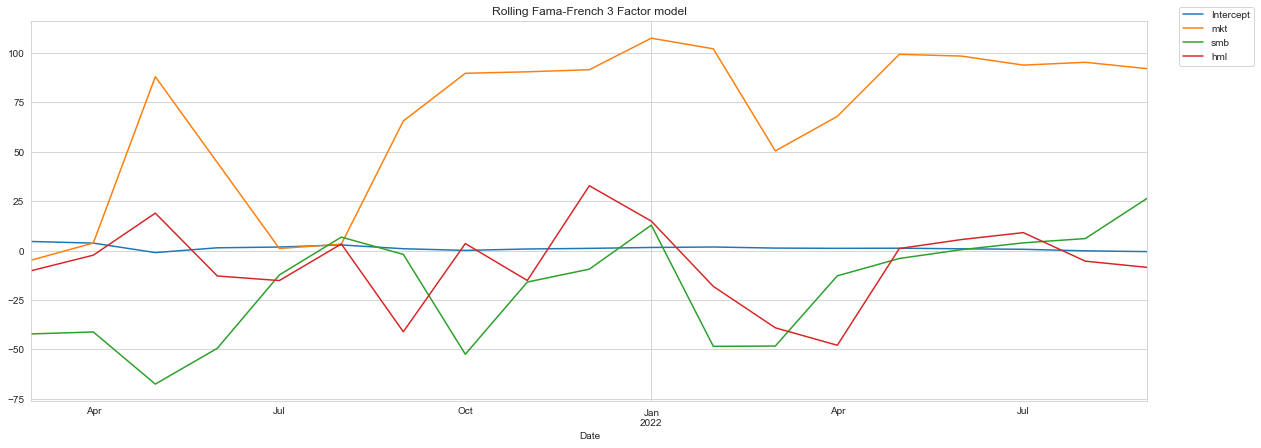

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 7))

results.plot(title=f'Rolling Fama-French 3 Factor model')
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [6]:
factors = ff.get_ff_industry_factors()
df = portf_returns.merge(factors,  left_index=True, right_index=True, how='inner')
summary, results = ff.industry_factor_model(df)
print(summary)

                            OLS Regression Results                            
Dep. Variable:              portf_rtn   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     204.3
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           3.40e-10
Time:                        02:28:00   Log-Likelihood:                -7.7484
No. Observations:                  21   AIC:                             37.50
Df Residuals:                      10   BIC:                             48.99
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6760      0.227      2.983      0.0

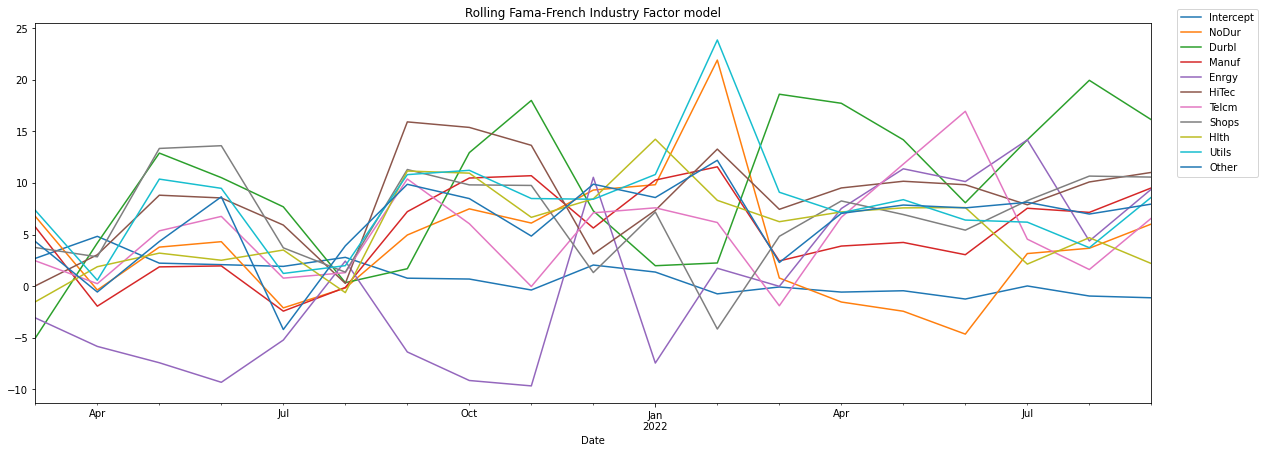

In [7]:
plt.rcParams["figure.figsize"] = (20,7)

results.plot(title=f'Rolling Fama-French Industry Factor model')
plt.legend(bbox_to_anchor=(1.1, 1.05))

## Brinson

In [27]:
...

Ellipsis

# Fundamentals

Fundamental Equity Analysis

In [8]:
ticker = ['JNJ']

In [9]:
rank = Ranks(ticker = ticker[0])
ranks = rank.get_ranks() 

In [10]:
fun = Fundamentals( ticker = ticker)
fun

<strong>Left Frame:</strong> Values as reported (in Millions, USD)<br>
<strong>Middle Frame:</strong> Percent Change <br>
<strong>Right Frame:</strong> Percentile Rank vs. Industry Peers (Higher values are assigned a lower percentile rank)<br>

In [11]:
x = fun.get( columns = Columns.INCOME.value, limit = 5 ).style_jupyter(fun.df)
y = fun.percent_change().style_jupyter(fun.pct_chg, units = '%')
z = ranks.style_jupyter(cols = Columns.INCOME.value)

display_side_by_side(x, y, z)

calendardate,2021-09-30,2021-12-31,2022-03-31,2022-06-30,2022-09-30
revenue,"$23,338.0","$24,804.0","$23,426.0","$24,020.0","$23,791.0"
cogs,"$7,250.0","$7,955.0","$7,598.0","$7,919.0","$7,807.0"
gp,"$16,088.0","$16,849.0","$15,828.0","$16,101.0","$15,984.0"
opex,"$10,382.0","$11,957.0","$10,080.0","$10,014.0","$9,768.0"
opinc,"$5,706.0","$4,892.0","$5,748.0","$6,087.0","$6,216.0"
ebt,"$3,849.0","$4,836.0","$5,862.0","$5,840.0","$5,822.0"
netinc,"$3,667.0","$4,736.0","$5,149.0","$4,814.0","$4,458.0"
ebitda,"$5,683.0","$6,739.0","$7,641.0","$7,622.0","$7,558.0"
depamor,"$1,814.0","$1,843.0","$1,769.0","$1,744.0","$1,685.0"
calendardate,2021-09-30,2021-12-31,2022-03-31,2022-06-30,2022-09-30


In [12]:
x = fun.get( columns = Columns.CASHFLOW.value, limit = 5 ).style_jupyter(fun.df)
y = fun.percent_change().style_jupyter(fun.pct_chg, units = '%')
z = ranks.style_jupyter(cols = Columns.CASHFLOW.value)

display_side_by_side(x, y, z)

calendardate,2021-09-30,2021-12-31,2022-03-31,2022-06-30,2022-09-30
cashneq,"$17,604.0","$14,487.0","$10,463.0","$10,983.0","$11,355.0"
netinc,"$3,667.0","$4,736.0","$5,149.0","$4,814.0","$4,458.0"
depamor,"$1,814.0","$1,843.0","$1,769.0","$1,744.0","$1,685.0"
opex,"$10,382.0","$11,957.0","$10,080.0","$10,014.0","$9,768.0"
receivables,"$14,911.0","$15,283.0","$15,594.0","$16,139.0","$15,890.0"
payables,"$8,961.0","$11,055.0","$9,309.0","$9,765.0","$10,153.0"
inventory,"$10,387.0","$10,387.0","$10,990.0","$11,437.0","$11,675.0"
ncfo,"$8,290.0","$5,732.0","$3,979.0","$5,581.0","$6,284.0"
ncfbus,$12.0,$-15.0,$-4.0,$-205.0,$9.0
ncfi,"$-2,719.0","$-5,360.0","$-3,634.0","$-2,639.0","$-1,701.0"


In [13]:
x = fun.get( columns = Columns.BALANCE.value, limit = 5 ).style_jupyter(fun.df)
y = fun.percent_change().style_jupyter(fun.pct_chg, units = '%')
z = ranks.style_jupyter(cols = Columns.BALANCE.value)

display_side_by_side(x, y, z)

calendardate,2021-09-30,2021-12-31,2022-03-31,2022-06-30,2022-09-30
assetsc,"$59,889.0","$60,979.0","$60,424.0","$63,847.0","$65,236.0"
assetsnc,"$119,339.0","$121,039.0","$117,931.0","$113,877.0","$109,888.0"
receivables,"$14,911.0","$15,283.0","$15,594.0","$16,139.0","$15,890.0"
inventory,"$10,387.0","$10,387.0","$10,990.0","$11,437.0","$11,675.0"
assets,"$179,228.0","$182,018.0","$178,355.0","$177,724.0","$175,124.0"
liabilitiesc,"$44,561.0","$45,226.0","$43,390.0","$44,821.0","$45,543.0"
liabilitiesnc,"$64,395.0","$62,769.0","$60,256.0","$56,546.0","$54,982.0"
payables,"$8,961.0","$11,055.0","$9,309.0","$9,765.0","$10,153.0"
debt,"$33,928.0","$33,751.0","$33,148.0","$32,597.0","$32,027.0"
equity,"$70,272.0","$74,023.0","$74,709.0","$76,357.0","$74,599.0"


In [14]:
x = fun.get( columns = Columns.PEERS.value, limit = 5 ).style_jupyter(fun.df, units = '%')
z = ranks.style_jupyter(cols = Columns.PEERS.value)

display_side_by_side(x, z)

calendardate,2021-09-30,2021-12-31,2022-03-31,2022-06-30,2022-09-30
divyield,2.60%,2.40%,2.40%,2.40%,2.70%
grossmargin,68.90%,67.90%,67.60%,67.00%,67.20%
netmargin,68.93%,67.93%,67.57%,67.03%,67.19%
fcfmargin,32.32%,17.40%,14.39%,19.64%,22.41%
oppmargin,24.45%,19.72%,24.54%,25.34%,26.13%
roe,5.22%,6.40%,6.89%,6.30%,5.98%
roic,nan%,nan%,nan%,nan%,nan%
ros,nan%,nan%,nan%,nan%,nan%
roc,3.52%,4.39%,4.77%,4.42%,4.18%
calendardate,2021-09-30,2021-12-31,2022-03-31,2022-06-30,2022-09-30


## Peers

Selected ticker vs Industry Peers

Drug Manufacturers - General


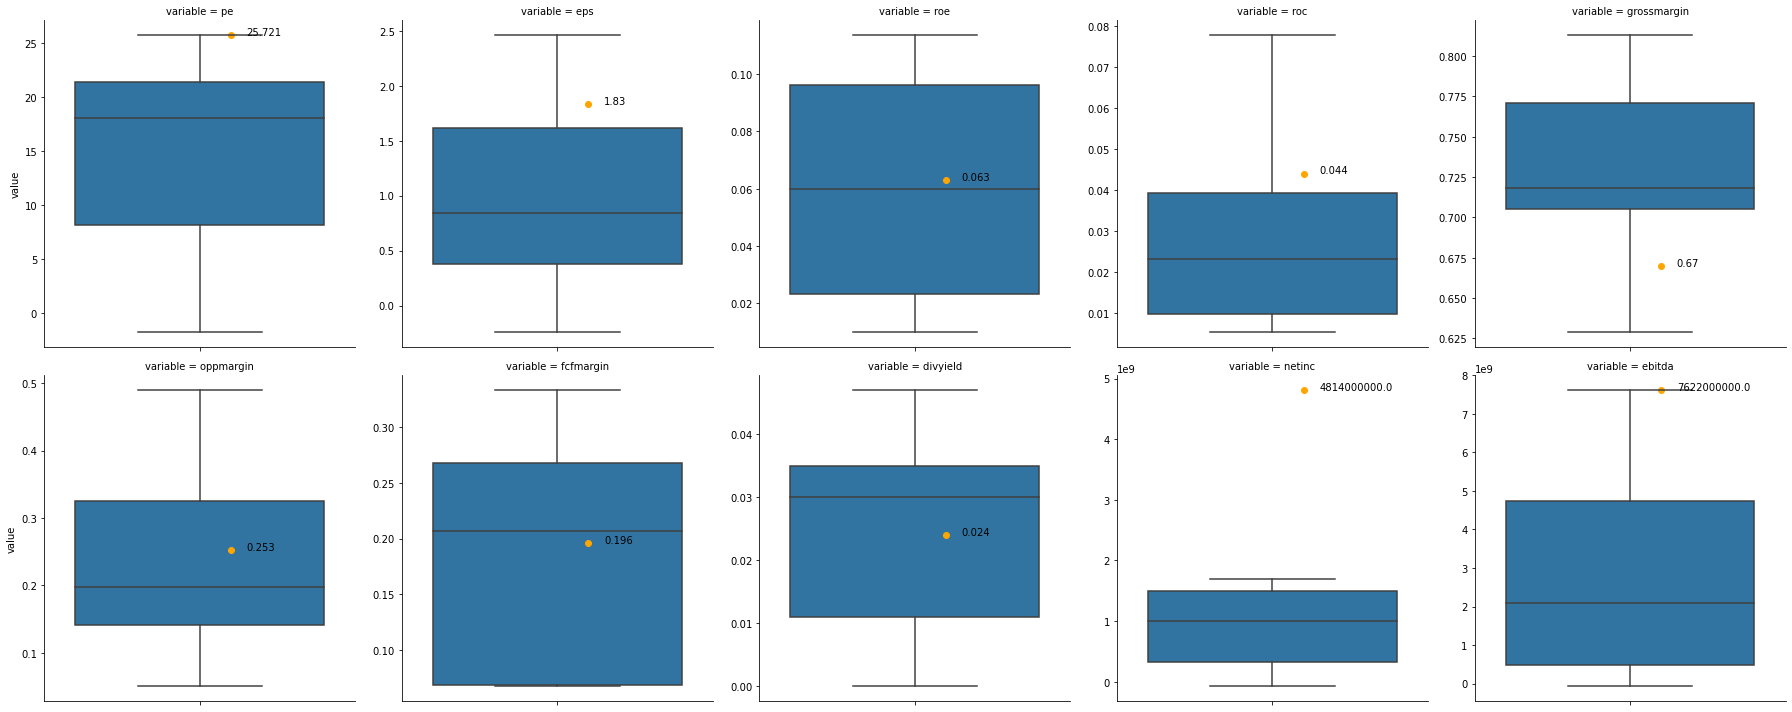

In [15]:
fun.plot_box_plot(cols = ['pe','eps','roe','roc','grossmargin', 'oppmargin','fcfmargin', 'divyield','netinc', 'ebitda'])

Drug Manufacturers - General


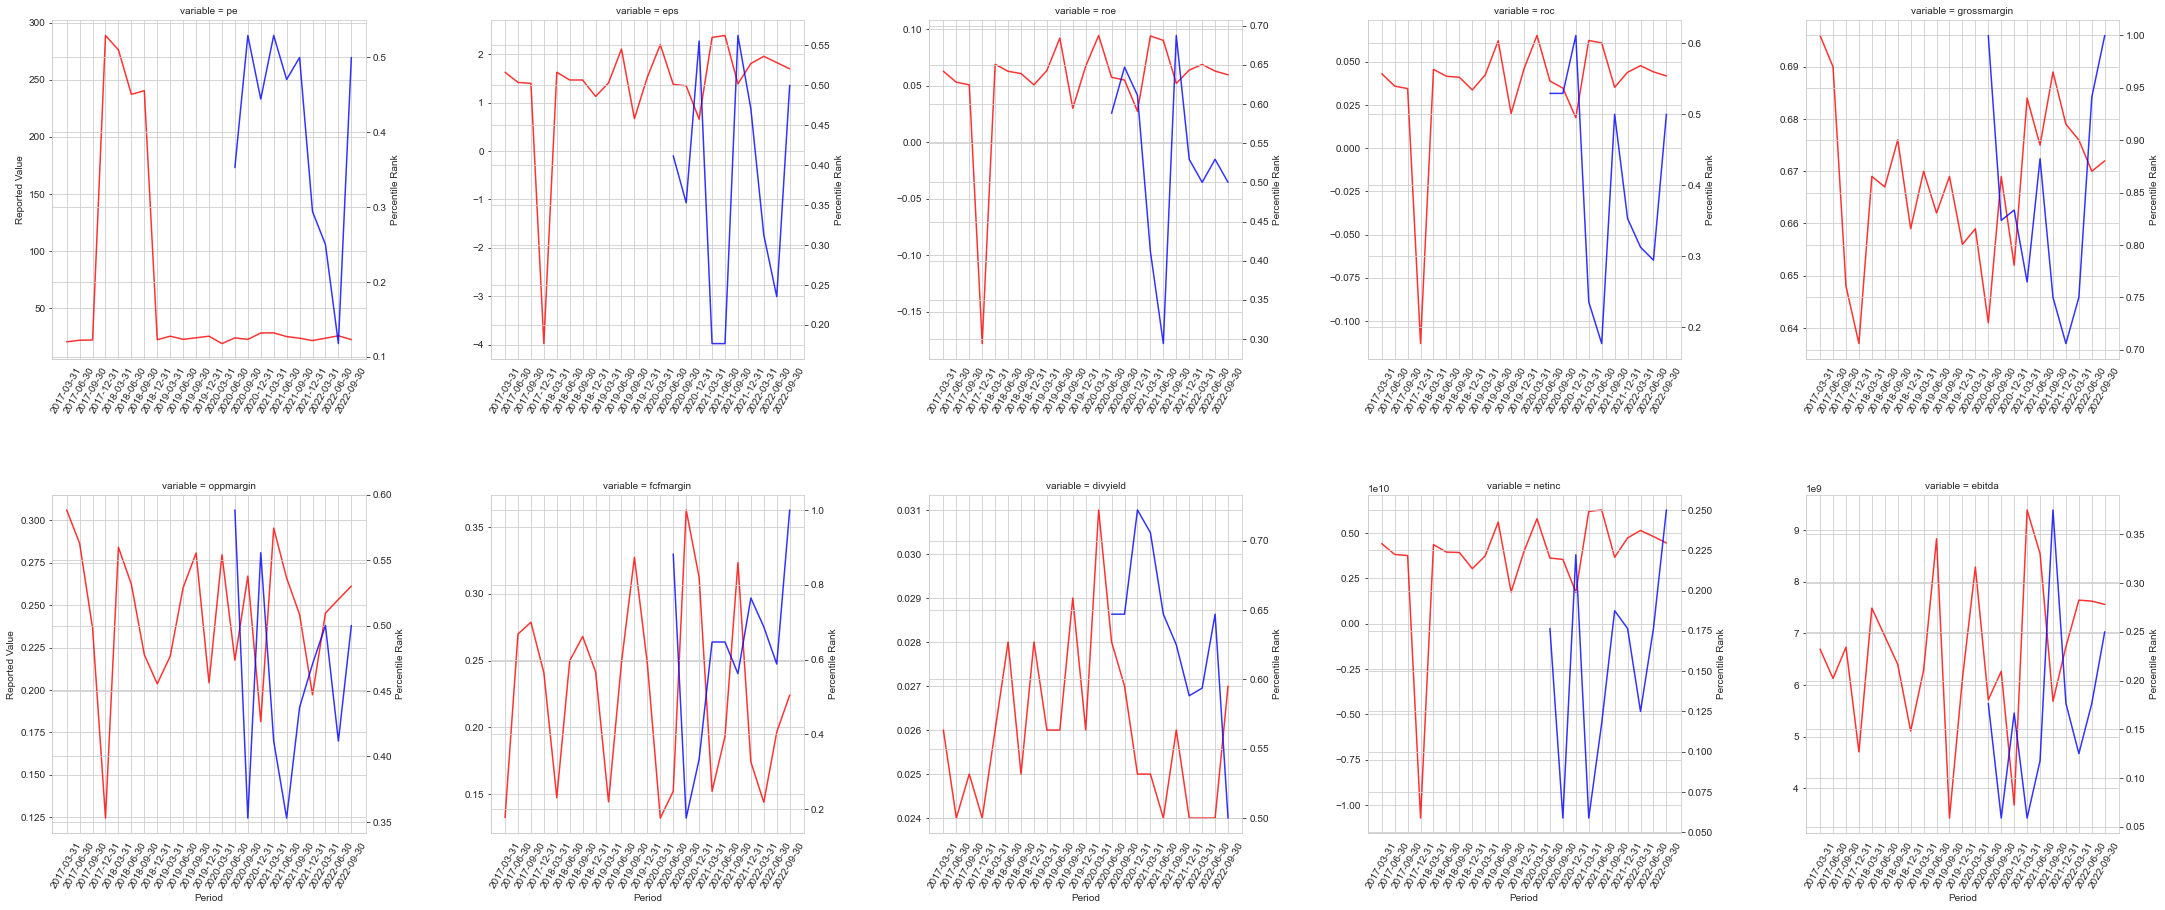

In [16]:
rank.plot_dual_axis_ranks(fun)

In [17]:
peers = fun.get_peers()
fun = Fundamentals( ticker = peers)
print(fun)

x = fun.get( columns = Columns.INCOME.value, limit = 5 ).style_jupyter(fun.df)
y = fun.get( columns = Columns.PEERS.value, limit = 5 ).style_jupyter(fun.df, units = '%')
z = fun.get( columns = Columns.CASHFLOW_.value, limit = 5 ).style_jupyter(fun.df)

display_side_by_side(x,y,z)

Drug Manufacturers - General
Fundamentals:Object:['JNJ', 'PFE', 'MRK', 'ABBV']


calendardate 
 2021-09-30 
 2021-12-31 
 2022-03-31 
 2022-06-30 
 2022-09-30 
 
 
   
 ticker 
   
   
   
   
   
 
 
 
 
 revenue 
 ABBV 
 $14,342 
 $14,886 
 $13,538 
 $14,583 
 $nan 
 
 
 JNJ 
 $23,338 
 $24,804 
 $23,426 
 $24,020 
 $23,791 
 
 
 MRK 
 $13,154 
 $13,521 
 $15,901 
 $14,593 
 $nan 
 
 
 PFE 
 $24,094 
 $23,635 
 $25,661 
 $27,742 
 $nan 
 
 
 cogs 
 ABBV 
 $4,390 
 $4,320 
 $4,052 
 $4,170 
 $nan 
 
 
 JNJ 
 $7,250 
 $7,955 
 $7,598 
 $7,919 
 $7,807 
 
 
 MRK 
 $3,450 
 $3,874 
 $5,380 
 $4,216 
 $nan 
 
 
 PFE 
 $9,973 
 $9,589 
 $9,984 
 $8,648 
 $nan 
 
 
 gp 
 ABBV 
 $9,952 
 $10,566 
 $9,486 
 $10,413 
 $nan 
 
 
 JNJ 
 $16,088 
 $16,849 
 $15,828 
 $16,101 
 $15,984 
 
 
 MRK 
 $9,704 
 $9,647 
 $10,521 
 $10,377 
 $nan 
 
 
 PFE 
 $14,121 
 $14,046 
 $15,677 
 $19,094 
 $nan 
 
 
 opex 
 ABBV 
 $5,646 
 $5,492 
 $4,769 
 $7,118 
 $nan 
 
 
 JNJ 
 $10,382 
 $11,957 
 $10,080 
 $10,014 
 $9,768 
 
 
 MRK 
 $4,888 
 $6,072 
 $4,952 
 $5,452 
 $nan 
 
 
 PFE 
 $6,283 
 $9,864 
 $6,626 
 $7,647 
 $nan 
 
 
 opinc 
 ABBV 
 $4,306 
 $5,074 
 $4,717 
 $3,295 
 $nan 
 
 
 JNJ 
 $5,706 
 $4,892 
 $5,748 
 $6,087 
 $6,216 
 
 
 MRK 
 $4,816 
 $3,575 
 $5,569 
 $4,925 
 $nan 
 
 
 PFE 
 $7,838 
 $4,182 
 $9,051 
 $11,447 
 $nan 
 
 
 ebt 
 ABBV 
 $3,687 
 $4,270 
 $4,926 
 $1,179 
 $nan 
 
 
 JNJ 
 $3,849 
 $4,836 
 $5,862 
 $5,840 
 $5,822 
 
 
 MRK 
 $5,262 
 $3,843 
 $4,864 
 $4,482 
 $nan 
 
 
 PFE 
 $7,816 
 $3,728 
 $9,036 
 $11,475 
 $nan 
 
 
 netinc 
 ABBV 
 $3,179 
 $4,044 
 $4,490 
 $924 
 $nan 
 
 
 JNJ 
 $3,667 
 $4,736 
 $5,149 
 $4,814 
 $4,458 
 
 
 MRK 
 $4,567 
 $3,758 
 $4,310 
 $3,944 
 $nan 
 
 
 PFE 
 $8,147 
 $3,394 
 $7,864 
 $9,905 
 $nan 
 
 
 ebitda 
 ABBV 
 $6,399 
 $6,820 
 $7,518 
 $3,763 
 $nan 
 
 
 JNJ 
 $5,683 
 $6,739 
 $7,641 
 $7,622 
 $7,558 
 
 
 MRK 
 $6,021 
 $4,678 
 $5,984 
 $5,420 
 $nan 
 
 
 PFE 
 $9,176 
 $5,005 
 $10,223 
 $12,650 
 $nan 
 
 
 depamor 
 ABBV 
 $2,127 
 $1,979 
 $2,053 
 $2,052 
 $nan 
 
 
 JNJ 
 $1,814 
 $1,843 
 $1,769 
 $1,744 
 $1,685 
 
 
 MRK 
 $759 
 $835 
 $1,120 
 $938 
 $nan 
 
 
 PFE 
 $1,360 
 $1,277 
 $1,187 
 $1,175 
 $nan 
 
 
 
 
 
 
 
   
 calendardate 
 2021-09-30 
 2021-12-31 
 2022-03-31 
 2022-06-30 
 2022-09-30 
 
 
   
 ticker 
   
   
   
   
   
 
 
 
 
 divyield 
 ABBV 
 4.70% 
 3.80% 
 3.30% 
 3.50% 
 nan% 
 
 
 JNJ 
 2.60% 
 2.40% 
 2.40% 
 2.40% 
 2.70% 
 
 
 MRK 
 3.50% 
 3.40% 
 3.30% 
 3.00% 
 nan% 
 
 
 PFE 
 3.60% 
 2.60% 
 3.00% 
 3.00% 
 nan% 
 
 
 grossmargin 
 ABBV 
 69.40% 
 71.00% 
 70.10% 
 71.40% 
 nan% 
 
 
 JNJ 
 68.90% 
 67.90% 
 67.60% 
 67.00% 
 67.20% 
 
 
 MRK 
 73.80% 
 71.30% 
 66.20% 
 71.10% 
 nan% 
 
 
 PFE 
 58.60% 
 59.40% 
 61.10% 
 68.80% 
 nan% 
 
 
 netmargin 
 ABBV 
 69.39% 
 70.98% 
 70.07% 
 71.41% 
 nan% 
 
 
 JNJ 
 68.93% 
 67.93% 
 67.57% 
 67.03% 
 67.19% 
 
 
 MRK 
 73.77% 
 71.35% 
 66.17% 
 71.11% 
 nan% 
 
 
 PFE 
 58.61% 
 59.43% 
 61.09% 
 68.83% 
 nan% 
 
 
 fcfmargin 
 ABBV 
 53.81% 
 32.84% 
 35.06% 
 33.34% 
 nan% 
 
 
 JNJ 
 32.32% 
 17.40% 
 14.39% 
 19.64% 
 22.41% 
 
 
 MRK 
 27.56% 
 28.27% 
 23.75% 
 21.74% 
 nan% 
 
 
 PFE 
 42.35% 
 20.82% 
 22.98% 
 26.74% 
 nan% 
 
 
 oppmargin 
 ABBV 
 30.02% 
 34.09% 
 34.84% 
 22.59% 
 nan% 
 
 
 JNJ 
 24.45% 
 19.72% 
 24.54% 
 25.34% 
 26.13% 
 
 
 MRK 
 36.61% 
 26.44% 
 35.02% 
 33.75% 
 nan% 
 
 
 PFE 
 32.53% 
 17.69% 
 35.27% 
 41.26% 
 nan% 
 
 
 roe 
 ABBV 
 23.46% 
 26.25% 
 27.57% 
 6.31% 
 nan% 
 
 
 JNJ 
 5.22% 
 6.40% 
 6.89% 
 6.30% 
 5.98% 
 
 
 MRK 
 12.76% 
 9.84% 
 10.54% 
 9.12% 
 nan% 
 
 
 PFE 
 10.76% 
 4.40% 
 9.54% 
 11.36% 
 nan% 
 
 
 roic 
 ABBV 
 nan% 
 nan% 
 nan% 
 nan% 
 nan% 
 
 
 JNJ 
 nan% 
 nan% 
 nan% 
 nan% 
 nan% 
 
 
 MRK 
 nan% 
 nan% 
 nan% 
 nan% 
 nan% 
 
 
 PFE 
 nan% 
 nan% 
 nan% 
 nan% 
 nan% 
 
 
 ros 
 ABBV 
 nan% 
 nan% 
 nan% 
 nan% 
 nan% 
 
 
 JNJ 
 nan% 
 nan% 
 nan% 
 nan% 
 nan% 
 
 
 MRK 
 nan% 
 nan% 
 nan% 
 nan% 
 nan% 
 
 
 PFE 
 nan% 
 nan% 
 nan% 
 nan% 
 nan% 


## DCF

In [18]:
fun = Fundamentals( ticker = ticker)
x = fun.get( columns = Columns.INCOME.value, limit = 8 ).percent_change().style_jupyter(fun.pct_chg, units='%')
y = fun.get( columns = Columns.INCOME.value, limit = 8).describe().style_jupyter(fun.desc, units = '%')
display_side_by_side(x, y)

Describe % Change:


calendardate 
 2020-12-31 
 2021-03-31 
 2021-06-30 
 2021-09-30 
 2021-12-31 
 2022-03-31 
 2022-06-30 
 2022-09-30 
 
 
 
 
 revenue 
 nan% 
 -0.69% 
 4.44% 
 0.11% 
 6.28% 
 -5.56% 
 2.54% 
 -0.95% 
 
 
 cogs 
 nan% 
 -9.61% 
 7.42% 
 -4.44% 
 9.72% 
 -4.49% 
 4.22% 
 -1.41% 
 
 
 gp 
 nan% 
 4.07% 
 3.06% 
 2.31% 
 4.73% 
 -6.06% 
 1.72% 
 -0.73% 
 
 
 opex 
 nan% 
 -18.17% 
 9.93% 
 9.02% 
 15.17% 
 -15.70% 
 -0.65% 
 -2.46% 
 
 
 opinc 
 nan% 
 61.84% 
 -5.96% 
 -8.00% 
 -14.27% 
 17.50% 
 5.90% 
 2.12% 
 
 
 ebt 
 nan% 
 351.06% 
 -10.32% 
 -42.22% 
 25.64% 
 21.22% 
 -0.38% 
 -0.31% 
 
 
 netinc 
 nan% 
 256.56% 
 1.31% 
 -41.59% 
 29.15% 
 8.72% 
 -6.51% 
 -7.40% 
 
 
 ebitda 
 nan% 
 155.47% 
 -9.00% 
 -33.46% 
 18.58% 
 13.38% 
 -0.25% 
 -0.84% 
 
 
 depamor 
 nan% 
 -2.37% 
 -2.90% 
 -1.36% 
 1.60% 
 -4.02% 
 -1.41% 
 -3.38% 
 
 
 
 
 
 
 
   
 mean 
 std 
 25% 
 50% 
 75% 
 
 
 
 
 revenue 
 0.88% 
 3.92% 
 -0.82% 
 0.11% 
 3.49% 
 
 
 cogs 
 0.20% 
 7.09% 
 -4.46% 
 -1.41% 
 5.82% 
 
 
 gp 
 1.30% 
 3.70% 
 0.50% 
 2.31% 
 3.57% 
 
 
 opex 
 -0.41% 
 12.86% 
 -9.08% 
 -0.65% 
 9.47% 
 
 
 opinc 
 8.45% 
 25.73% 
 -6.98% 
 2.12% 
 11.70% 
 
 
 ebt 
 49.24% 
 134.95% 
 -5.35% 
 -0.31% 
 23.43% 
 
 
 netinc 
 34.32% 
 100.28% 
 -6.95% 
 1.31% 
 18.94% 
 
 
 ebitda 
 20.55% 
 61.83% 
 -4.92% 
 -0.25% 
 15.98% 
 
 
 depamor 
 -1.98% 
 1.85% 
 -3.14% 
 -2.37% 
 -1.39%

## Base Case

In [19]:
dcf = DCF(ticker=ticker, REV_GROWTH=0.025)
dcf.forecast_as_percent_of_revenue(type = 'INCOME')
dcf.forecast_as_percent_of_revenue(type = 'BALANCE')
dcf.forecast_as_percent_of_revenue(type = 'CF')
None

In [20]:
x = dcf.style_jupyter(dcf.bal_forecast)
y = dcf.style_jupyter(dcf.inc_forecast)
display_side_by_side(x,y)
dcf.style_jupyter(dcf.cf_forecast)

,2021-09-30,2021-12-31,2022-03-31,2022-06-30,2022-09-30,T+1,T+2,T+3,T+4,T+5
assetsc,"$59,889.0","$60,979.0","$60,424.0","$63,847.0","$65,236.0","$62,899.6","$64,472.09","$66,083.89","$67,735.99","$69,429.39"
assetsnc,"$119,339.0","$121,039.0","$117,931.0","$113,877.0","$109,888.0","$118,998.14","$121,973.09","$125,022.42","$128,147.98","$131,351.68"
receivables,"$14,911.0","$15,283.0","$15,594.0","$16,139.0","$15,890.0","$16,232.89","$16,638.72","$17,054.68","$17,481.05","$17,918.08"
inventory,"$10,387.0","$10,387.0","$10,990.0","$11,437.0","$11,675.0","$11,440.27","$11,726.27","$12,019.43","$12,319.92","$12,627.91"
assets,"$179,228.0","$182,018.0","$178,355.0","$177,724.0","$175,124.0","$180,430.37","$184,941.13","$189,564.66","$194,303.77","$199,161.37"
liabilitiesc,"$44,561.0","$45,226.0","$43,390.0","$44,821.0","$45,543.0","$45,503.53","$46,641.12","$47,807.15","$49,002.33","$50,227.38"
liabilitiesnc,"$64,395.0","$62,769.0","$60,256.0","$56,546.0","$54,982.0","$61,710.64","$63,253.41","$64,834.74","$66,455.61","$68,117.0"
payables,"$8,961.0","$11,055.0","$9,309.0","$9,765.0","$10,153.0","$9,913.7","$10,161.54","$10,415.58","$10,675.97","$10,942.87"
debt,"$33,928.0","$33,751.0","$33,148.0","$32,597.0","$32,027.0","$33,181.92","$34,011.47","$34,861.75","$35,733.3","$36,626.63"
equity,"$70,272.0","$74,023.0","$74,709.0","$76,357.0","$74,599.0","$76,463.97","$78,375.57","$80,334.96","$82,343.34","$84,401.92"


,2021-09-30,2021-12-31,2022-03-31,2022-06-30,2022-09-30,T+1,T+2,T+3,T+4,T+5
netinc,"$3,667.0","$4,736.0","$5,149.0","$4,814.0","$4,458.0","$4,656.15","$4,772.55","$4,891.86","$5,014.16","$5,139.51"
revenue,"$23,338.0","$24,804.0","$23,426.0","$24,020.0","$23,791.0","$24,385.78","$24,995.42","$25,620.3","$26,260.81","$26,917.33"
cogs,"$7,250.0","$7,955.0","$7,598.0","$7,919.0","$7,807.0","$7,909.29","$8,107.03","$8,309.7","$8,517.44","$8,730.38"
gp,"$16,088.0","$16,849.0","$15,828.0","$16,101.0","$15,984.0","$16,476.48","$16,888.39","$17,310.6","$17,743.37","$18,186.95"
rnd,"$3,422.0","$4,720.0","$3,462.0","$3,703.0","$3,597.0","$3,686.92","$3,779.1","$3,873.58","$3,970.41","$4,069.68"
sgna,"$6,000.0","$7,154.0","$5,938.0","$6,226.0","$6,089.0","$6,269.37","$6,426.11","$6,586.76","$6,751.43","$6,920.22"
ebit,"$3,869.0","$4,896.0","$5,872.0","$5,878.0","$5,873.0","$5,967.51","$6,116.7","$6,269.61","$6,426.36","$6,587.01"
payables,"$8,961.0","$11,055.0","$9,309.0","$9,765.0","$10,153.0","$9,913.7","$10,161.54","$10,415.58","$10,675.97","$10,942.87"
receivables,"$14,911.0","$15,283.0","$15,594.0","$16,139.0","$15,890.0","$16,232.89","$16,638.72","$17,054.68","$17,481.05","$17,918.08"
inventory,"$10,387.0","$10,387.0","$10,990.0","$11,437.0","$11,675.0","$11,440.27","$11,726.27","$12,019.43","$12,319.92","$12,627.91"


In [21]:
dcf.forecast_cf_from_opperations()
dcf.discount(ERM = 0.04, RFR = 0)
dcf.terminal_value(TERMINAL_GROWTH=0.05)
dcf.estimate_price_per_share()

[*********************100%***********************]  2 of 2 completed
beta:  1.0099821710703265
wacc:  0.028522862940331146
npv:  23785727738.735157
terminal value:  173923129507.96133
pv future cash flows:  75.19791917726364


## Bull

In [22]:
dcf = DCF(ticker=ticker, REV_GROWTH=0.06)
dcf.forecast_as_percent_of_revenue(type = 'INCOME')
dcf.forecast_as_percent_of_revenue(type = 'BALANCE')
dcf.forecast_as_percent_of_revenue(type = 'CF')
dcf.forecast_cf_from_opperations()
dcf.discount(ERM = 0.04, RFR = 0)
dcf.terminal_value(TERMINAL_GROWTH=0.06)
dcf.estimate_price_per_share()

[*********************100%***********************]  2 of 2 completed
beta:  1.0099812716638656
wacc:  0.028586613355057574
npv:  26326701886.586563
terminal value:  207160353269.31195
pv future cash flows:  88.80604008874734


# Bear

In [23]:
dcf = DCF(ticker=ticker, REV_GROWTH=0.01)
dcf.forecast_as_percent_of_revenue(type = 'INCOME')
dcf.forecast_as_percent_of_revenue(type = 'BALANCE')
dcf.forecast_as_percent_of_revenue(type = 'CF')
dcf.forecast_cf_from_opperations()
dcf.discount(ERM = 0.04, RFR = 0)
dcf.terminal_value(TERMINAL_GROWTH=0.02)
dcf.estimate_price_per_share()

[*********************100%***********************]  2 of 2 completed
beta:  1.0099819729118134
wacc:  0.02849805553429688
npv:  22765010236.517982
terminal value:  157099767701.98563
pv future cash flows:  68.4109817972359


# Technicals

In [24]:
tech = Technicals()

[*********************100%***********************]  1 of 1 completed
Adj Close    174.869995
Name: 2022-10-28 00:00:00, dtype: float64


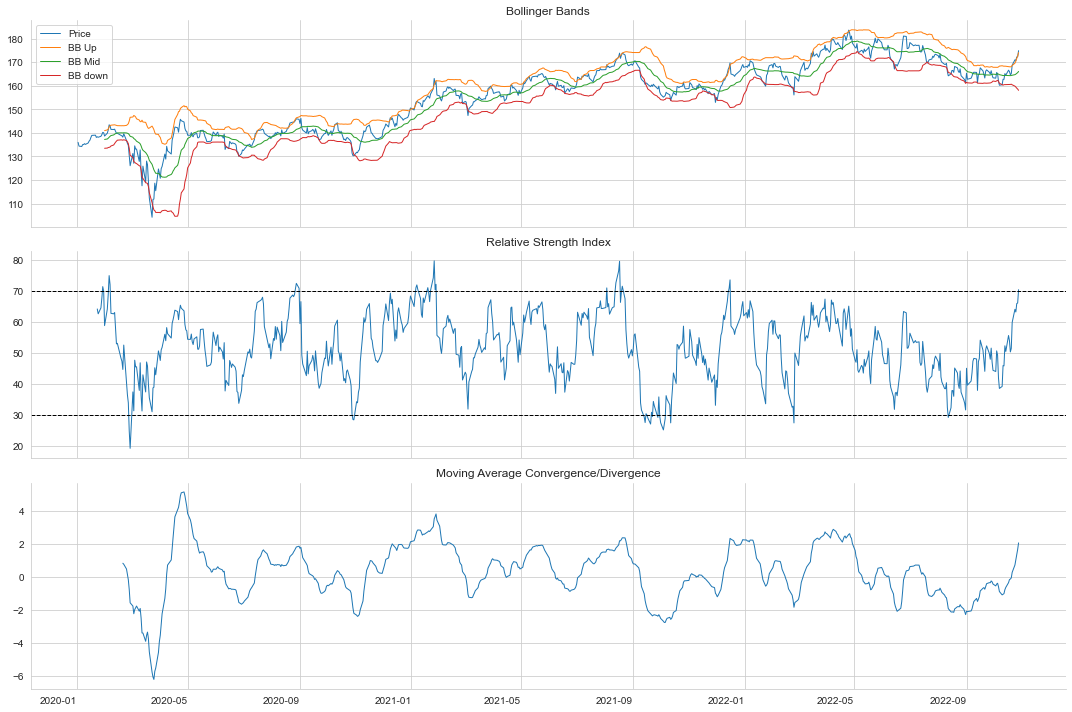

In [25]:
tech.ta_dashboard(fun)

# Interest Rates

In [32]:
...

Ellipsis

# Economic Activity

In [33]:
...

Ellipsis